# Project Title: Mental Health Prediction in Tech Employees Using Logistic Regression.


## Objective
### Predict whether a tech employee will seek mental health treatment based on survey responses.

##  Dataset Overview
[Source: OSMI Mental Health in Tech Survey (Kaggle)](https://www.kaggle.com/datasets/osmi/mental-health-in-tech-survey)

# Data Collection & Loading

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Read csv file
df = pd.read_csv("survey.csv")
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [4]:
df.sample(5)

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
599,2014-08-27 22:26:03,31,Male,United States,NY,No,Yes,Yes,Rarely,100-500,...,Somewhat difficult,Yes,Yes,Some of them,No,No,No,No,Yes,NaN
978,2014-08-29 08:54:23,26,male,Belgium,NaN,No,No,No,Never,6-25,...,Somewhat easy,Maybe,No,No,No,No,No,Don't know,No,NaN
547,2014-08-27 18:18:18,36,Male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,...,Somewhat difficult,Yes,No,Some of them,Yes,No,Yes,No,No,NaN
70,2014-08-27 11:53:05,28,m,France,NaN,No,No,No,Never,26-100,...,Don't know,Maybe,No,Some of them,Some of them,No,No,Don't know,No,NaN
392,2014-08-27 15:24:49,31,Male,United States,SC,No,No,No,Never,More than 1000,...,Somewhat easy,Yes,No,Some of them,No,No,No,Don't know,No,NaN


In [5]:
# Show basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [6]:
print(df.shape)

(1259, 27)


In [7]:
df.columns

Index(['Timestamp', 'Age', 'Gender', 'Country', 'state', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments'],
      dtype='object')

In [8]:
df.isnull().sum()

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

In [9]:
# Visualizing missing values using missingno
import missingno as msno

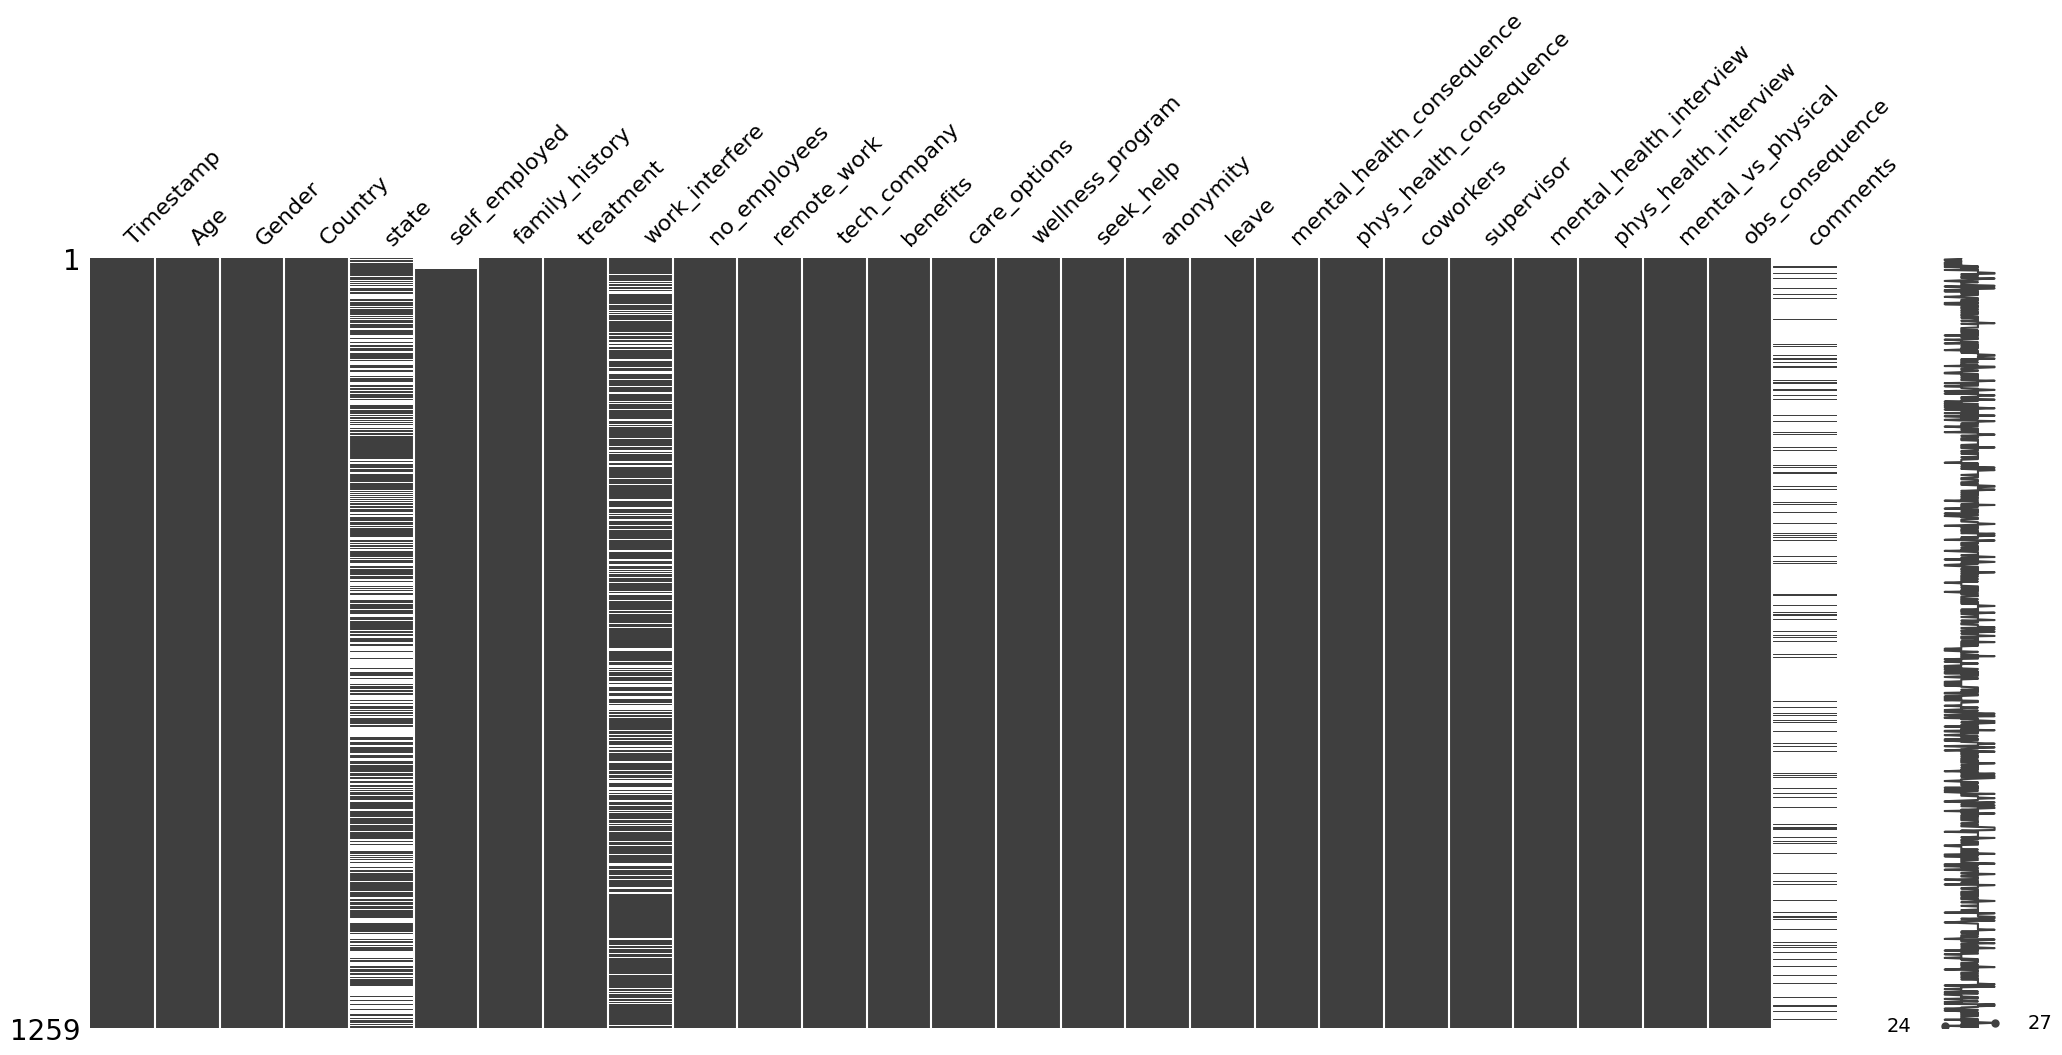

In [10]:
msno.matrix(df)
plt.show()

In [11]:
# Drop irrelavant columns
df.drop(columns=[
    'comments',          # Free text
    'state',             # Too specific, inconsistent
    'Timestamp',         # Not useful for prediction
    'Country',           # Not reliable without proper normalization
    'self_employed',     # High NaNs, unless you want to impute
    'mental_health_interview',  # Outcome-based
    'phys_health_interview',    # Outcome-based
    'obs_consequence'    # Subjective judgment
], inplace=True, errors='ignore')

In [12]:
df.sample(5)

,Age,Gender,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_vs_physical
655,25,Male,No,No,NaN,6-25,No,Yes,No,No,No,No,Don't know,Don't know,Maybe,No,Yes,Yes,Don't know
212,26,Male,No,Yes,Often,1-5,Yes,Yes,No,No,No,No,Don't know,Don't know,Yes,No,No,No,Don't know
259,25,Male,Yes,Yes,Often,6-25,No,Yes,No,Yes,No,No,No,Very difficult,Yes,Maybe,No,No,No
766,33,Female,Yes,Yes,Sometimes,1-5,No,Yes,Yes,Yes,Yes,Yes,Yes,Somewhat easy,Maybe,Yes,Some of them,No,No
345,25,F,Yes,Yes,Sometimes,26-100,No,Yes,Yes,Yes,No,No,Yes,Don't know,No,No,Some of them,Yes,Don't know


# Univariate Analysis 


In [13]:
# Checking Age distribution 
# First check for weird values in 'Age'

print("Min age:", df['Age'].min())
print("Max age:", df['Age'].max())
print("Nulls in age:", df['Age'].isnull().sum())



Min age: -1726
Max age: 99999999999
Nulls in age: 0


In [14]:
df = df[(df['Age'] >= 18) & (df['Age'] <= 70)]


In [15]:
print("Min age:", df['Age'].min())
print("Max age:", df['Age'].max())
print("Nulls in age:", df['Age'].isnull().sum())

Min age: 18
Max age: 65
Nulls in age: 0


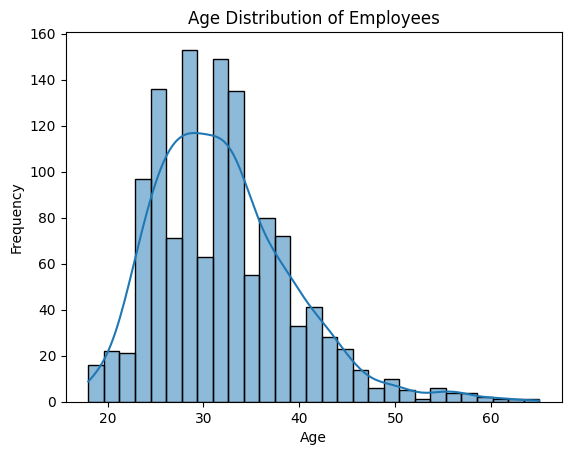

In [16]:
sns.histplot(df['Age'], kde=True)
plt.title('Age Distribution of Employees')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


In [17]:
df.columns

Index(['Age', 'Gender', 'family_history', 'treatment', 'work_interfere',
       'no_employees', 'remote_work', 'tech_company', 'benefits',
       'care_options', 'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_vs_physical'],
      dtype='object')

In [18]:
# Rename column name for consistency
df.rename(columns={'Age': 'age'}, inplace=True)


In [19]:
df.rename(columns={'Gender':'gender'}, inplace=True)

In [20]:
df.sample(5)

,age,gender,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_vs_physical
522,35,Male,No,No,NaN,More than 1000,No,No,No,No,No,No,Don't know,Don't know,Maybe,Maybe,No,No,No
714,32,Male,Yes,Yes,Sometimes,1-5,Yes,Yes,Yes,Yes,Don't know,Don't know,Don't know,Very difficult,Yes,Maybe,Some of them,No,No
769,28,Male,No,No,Never,26-100,No,Yes,Don't know,Not sure,No,No,Don't know,Somewhat easy,No,No,Some of them,Yes,Don't know
443,33,female,No,No,NaN,100-500,Yes,Yes,Yes,No,Don't know,No,Don't know,Don't know,No,No,Some of them,Yes,Yes
871,32,Female,Yes,Yes,Sometimes,100-500,No,Yes,Don't know,No,No,No,Don't know,Somewhat difficult,Maybe,No,Some of them,Some of them,Don't know


<Axes: xlabel='treatment', ylabel='age'>

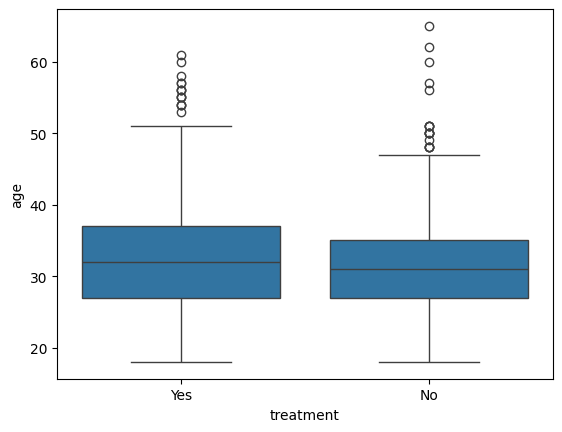

In [21]:
sns.boxplot(x='treatment' , y='age', data=df)

In [22]:
df['gender']


0       Female
1            M
2         Male
3         Male
4         Male
         ...  
1254      male
1255      Male
1256      male
1257         f
1258      Male
Name: gender, Length: 1250, dtype: object

In [23]:
print(df['gender'].value_counts())

gender
Male                                              612
male                                              204
Female                                            120
M                                                 116
female                                             62
F                                                  38
m                                                  34
f                                                  15
Make                                                4
Woman                                               3
Male                                                3
Female                                              2
Cis Male                                            2
Man                                                 2
Female (trans)                                      2
something kinda male?                               1
Trans-female                                        1
Cis Female                                          1
Male-ish             

In [24]:
# Define the clean_gender function
def clean_gender(gender):
    gender = gender.strip().lower()
    if 'female' in gender or 'f' in gender:
        return 'female'
    elif 'male' in gender or 'm' in gender:
        return 'male'
    else:
        return 'other'

# Apply it to the 'gender' column
df['gender'] = df['gender'].fillna('other')  # Fill missing with 'other'
df['gender'] = df['gender'].apply(clean_gender)

In [25]:
df['gender'].value_counts()

gender
male      994
female    246
other      10
Name: count, dtype: int64

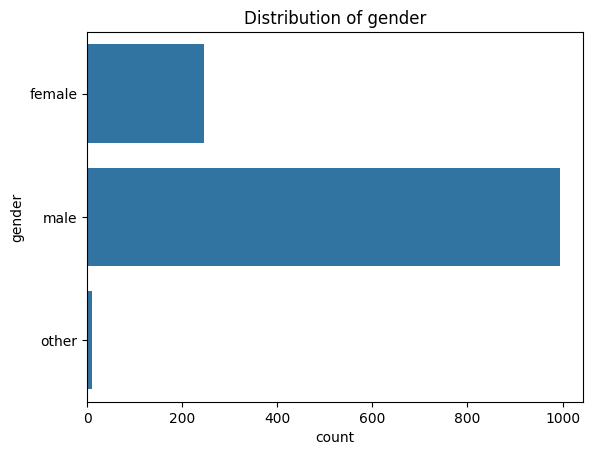

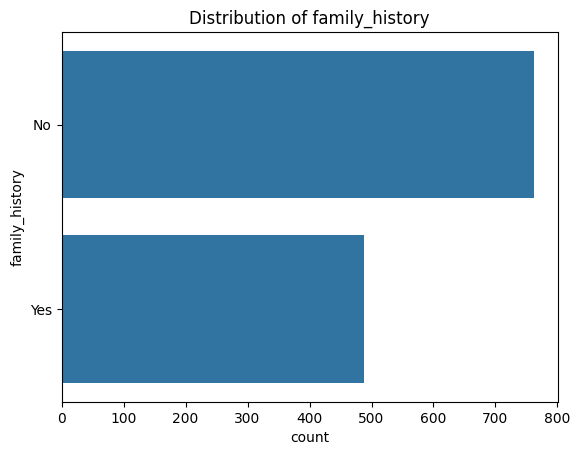

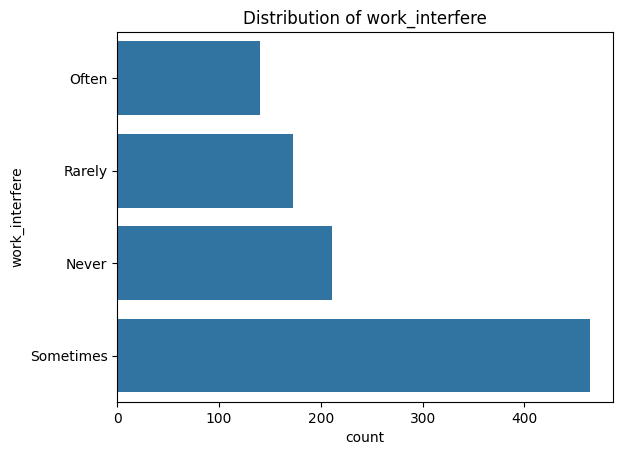

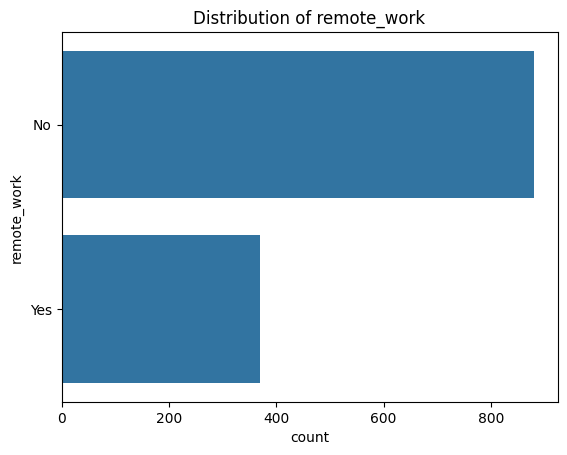

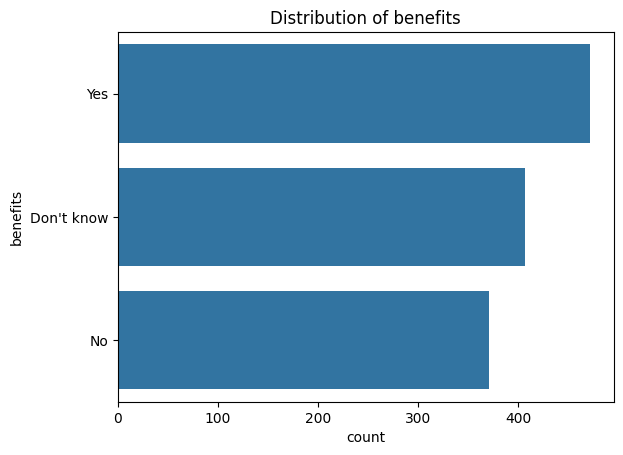

In [26]:
# Categorical Feature distribution
# It reveals bias or imbalace data collection
for col in ['gender', 'family_history', 'work_interfere', 'remote_work', 'benefits']:
    sns.countplot(y =col, data=df)
    plt.title(f'Distribution of {col}')
    plt.show()

# Bivariate Analysis (Target vs Feature)

In [27]:
# It check how two features are related with each others.

<Axes: xlabel='gender', ylabel='count'>

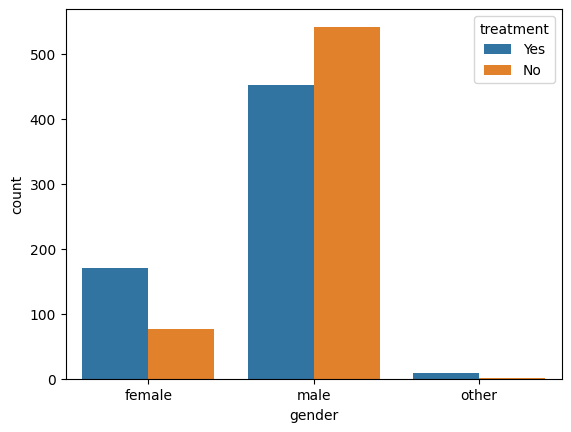

In [28]:
sns.countplot(x='gender', hue='treatment', data=df)


<Axes: xlabel='remote_work', ylabel='count'>

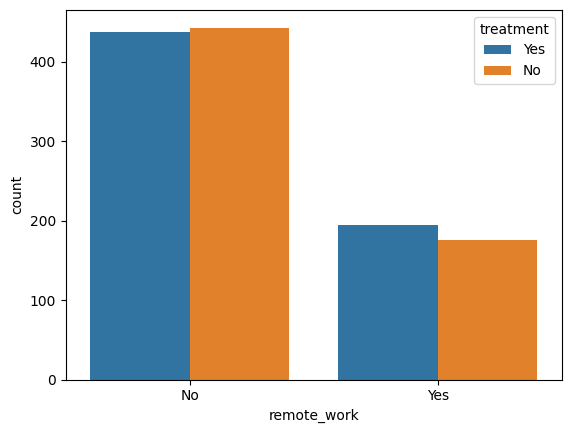

In [29]:
sns.countplot(x='remote_work', hue='treatment', data=df)


<Axes: xlabel='treatment', ylabel='age'>

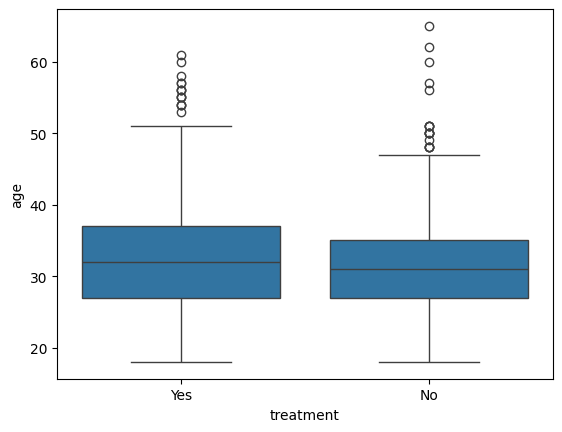

In [30]:
sns.boxplot(x='treatment', y='age', data=df)


## Correlation Matrix

In [31]:
# Shows how features like Age , family_history etc. related numerically to treatment
# Helps use guide in feature selection

In [32]:
from sklearn.preprocessing import LabelEncoder
label_enc = LabelEncoder()

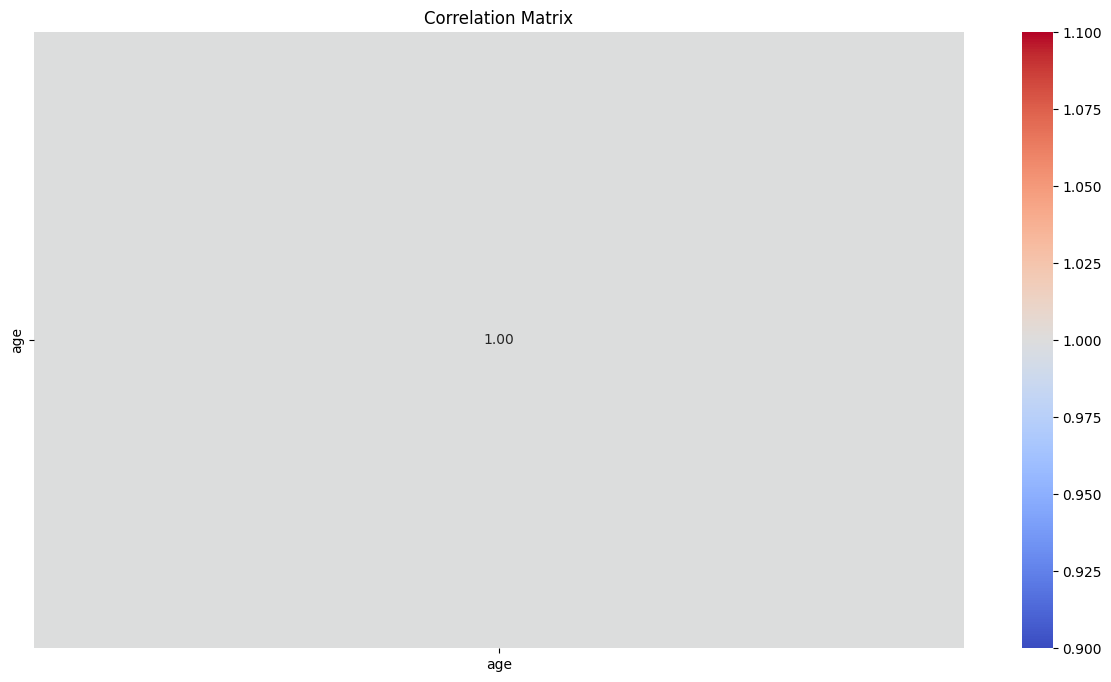

In [33]:
import seaborn as sns

encoded_df = df.copy()

numeric_df = encoded_df.select_dtypes(include=['int64', 'float64'])

corr = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


<Axes: xlabel='gender', ylabel='count'>

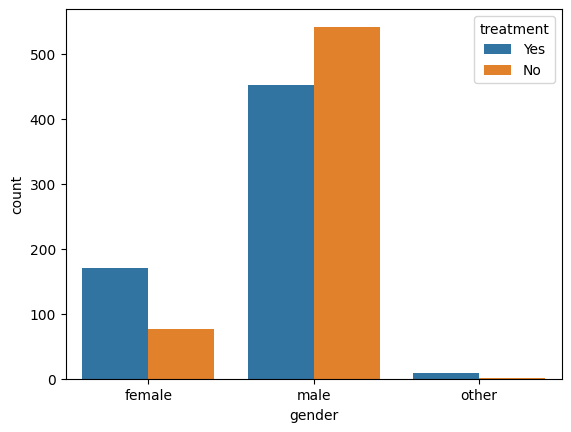

In [34]:
sns.countplot(x='gender', hue='treatment', data=df)

# Data Preprocessing - Handling missing values

In [35]:
df.isnull().sum()

age                            0
gender                         0
family_history                 0
treatment                      0
work_interfere               262
no_employees                   0
remote_work                    0
tech_company                   0
benefits                       0
care_options                   0
wellness_program               0
seek_help                      0
anonymity                      0
leave                          0
mental_health_consequence      0
phys_health_consequence        0
coworkers                      0
supervisor                     0
mental_vs_physical             0
dtype: int64

In [36]:
df['work_interfere']

0           Often
1          Rarely
2          Rarely
3           Often
4           Never
          ...    
1254          NaN
1255        Often
1256    Sometimes
1257          NaN
1258    Sometimes
Name: work_interfere, Length: 1250, dtype: object

In [37]:
# Fill the missing values 
df['work_interfere'].fillna('Don\'t know', inplace=True)

In [38]:
df.head()

,age,gender,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_vs_physical
0,37,female,No,Yes,Often,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,Yes
1,44,male,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,Don't know
2,32,male,No,No,Rarely,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,No
3,31,male,Yes,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,No
4,31,male,No,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Don't know


In [39]:
df['work_interfere'].sample(10)

1086     Sometimes
729      Sometimes
256      Sometimes
476      Sometimes
545     Don't know
586          Often
363         Rarely
44       Sometimes
693     Don't know
644         Rarely
Name: work_interfere, dtype: object

In [40]:
df.sample(5)

,age,gender,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_vs_physical
656,29,male,No,No,Rarely,1-5,No,Yes,No,No,No,No,No,Somewhat difficult,No,Maybe,Some of them,No,Yes
549,30,male,No,No,Often,26-100,No,Yes,No,No,Don't know,No,Don't know,Somewhat easy,Maybe,No,Some of them,Some of them,Don't know
132,27,male,No,No,Never,26-100,No,Yes,Don't know,Not sure,Don't know,Don't know,Don't know,Don't know,No,No,Yes,Yes,Don't know
764,27,female,No,Yes,Sometimes,100-500,No,Yes,Don't know,Not sure,Yes,Don't know,Don't know,Somewhat easy,Yes,No,Some of them,No,No
498,54,male,No,Yes,Sometimes,More than 1000,Yes,No,No,Yes,Yes,Yes,Yes,Very easy,No,No,Yes,Yes,No


## Encoding Categorical Features 
#### Label encoding (for binary)
#### One-hot-encoding (for multi category) 

In [41]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['treatment'] = le.fit_transform(df['treatment'])

In [42]:
df.columns

Index(['age', 'gender', 'family_history', 'treatment', 'work_interfere',
       'no_employees', 'remote_work', 'tech_company', 'benefits',
       'care_options', 'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_vs_physical'],
      dtype='object')

In [43]:
from sklearn.preprocessing import LabelEncoder

# Label encode the target variable 'treatment'
le = LabelEncoder()
df['treatment'] = le.fit_transform(df['treatment'])  # Yes -> 1, No -> 0

# One-hot encode relevant categorical features
categorical_cols = ['gender', 'family_history', 'treatment', 'work_interfere',
       'no_employees', 'remote_work', 'tech_company', 'benefits',
       'care_options', 'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_vs_physical'
]

# One-hot encoding with drop_first=True to avoid dummy variable trap
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [44]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df['age'] = scaler.fit_transform(df[['age']])

In [45]:
df.select_dtypes(include='object').nunique()

Series([], dtype: float64)

In [46]:
df.sample(4)

,age,gender_male,gender_other,family_history_Yes,treatment_1,work_interfere_Never,work_interfere_Often,work_interfere_Rarely,work_interfere_Sometimes,no_employees_100-500,...,mental_health_consequence_No,mental_health_consequence_Yes,phys_health_consequence_No,phys_health_consequence_Yes,coworkers_Some of them,coworkers_Yes,supervisor_Some of them,supervisor_Yes,mental_vs_physical_No,mental_vs_physical_Yes
577,0.132663,True,False,True,False,False,False,False,True,False,...,True,False,True,False,True,False,False,True,False,True
398,-0.006222,False,False,False,False,True,False,False,False,True,...,False,False,True,False,False,False,True,False,False,False
1164,1.938170,False,False,False,True,False,True,False,False,True,...,False,False,True,False,True,False,True,False,True,False
908,0.549319,True,False,False,True,False,False,True,False,False,...,False,False,True,False,False,False,False,False,False,False


In [47]:
df.select_dtypes(include='object').columns

Index([], dtype='object')

In [48]:
df.columns

Index(['age', 'gender_male', 'gender_other', 'family_history_Yes',
       'treatment_1', 'work_interfere_Never', 'work_interfere_Often',
       'work_interfere_Rarely', 'work_interfere_Sometimes',
       'no_employees_100-500', 'no_employees_26-100', 'no_employees_500-1000',
       'no_employees_6-25', 'no_employees_More than 1000', 'remote_work_Yes',
       'tech_company_Yes', 'benefits_No', 'benefits_Yes',
       'care_options_Not sure', 'care_options_Yes', 'wellness_program_No',
       'wellness_program_Yes', 'seek_help_No', 'seek_help_Yes', 'anonymity_No',
       'anonymity_Yes', 'leave_Somewhat difficult', 'leave_Somewhat easy',
       'leave_Very difficult', 'leave_Very easy',
       'mental_health_consequence_No', 'mental_health_consequence_Yes',
       'phys_health_consequence_No', 'phys_health_consequence_Yes',
       'coworkers_Some of them', 'coworkers_Yes', 'supervisor_Some of them',
       'supervisor_Yes', 'mental_vs_physical_No', 'mental_vs_physical_Yes'],
      dtype='o

In [49]:
for col in df.select_dtypes(include='object').columns:
    print(f"{col} unique values:\n", df[col].unique(), "\n")


In [50]:
binary_cols = ['gender_male', 'gender_other', 'family_history_Yes',
       'treatment_1', 'work_interfere_Never', 'work_interfere_Often',
       'work_interfere_Rarely', 'work_interfere_Sometimes',
       'no_employees_100-500', 'no_employees_26-100', 'no_employees_500-1000',
       'no_employees_6-25', 'no_employees_More than 1000', 'remote_work_Yes',
       'tech_company_Yes', 'benefits_No', 'benefits_Yes',
       'care_options_Not sure', 'care_options_Yes', 'wellness_program_No',
       'wellness_program_Yes', 'seek_help_No', 'seek_help_Yes', 'anonymity_No',
       'anonymity_Yes', 'leave_Somewhat difficult', 'leave_Somewhat easy',
       'leave_Very difficult', 'leave_Very easy',
       'mental_health_consequence_No', 'mental_health_consequence_Yes',
       'phys_health_consequence_No', 'phys_health_consequence_Yes',
       'coworkers_Some of them', 'coworkers_Yes', 'supervisor_Some of them',
       'supervisor_Yes', 'mental_vs_physical_No', 'mental_vs_physical_Yes']

In [51]:
for col in binary_cols:
    if col in df.columns:
        df[col] = df[col].astype(int)

print(df)

           age  gender_male  gender_other  family_history_Yes  treatment_1  \
0     0.688204            0             0                   0            1   
1     1.660400            1             0                   0            0   
2    -0.006222            1             0                   0            0   
3    -0.145107            1             0                   1            1   
4    -0.145107            1             0                   0            0   
...        ...          ...           ...                 ...          ...   
1254 -0.839533            1             0                   0            1   
1255 -0.006222            1             0                   1            1   
1256  0.271548            1             0                   1            1   
1257  1.938170            0             0                   0            0   
1258 -0.978418            1             0                   1            1   

      work_interfere_Never  work_interfere_Often  work_interfer

In [52]:
df.sample(5)

,age,gender_male,gender_other,family_history_Yes,treatment_1,work_interfere_Never,work_interfere_Often,work_interfere_Rarely,work_interfere_Sometimes,no_employees_100-500,...,mental_health_consequence_No,mental_health_consequence_Yes,phys_health_consequence_No,phys_health_consequence_Yes,coworkers_Some of them,coworkers_Yes,supervisor_Some of them,supervisor_Yes,mental_vs_physical_No,mental_vs_physical_Yes
292,1.799285,1,0,1,1,0,0,0,1,0,...,0,0,1,0,1,0,1,0,0,0
560,4.576988,1,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1257,1.938170,0,0,0,0,0,0,0,0,1,...,0,1,1,0,0,0,0,0,1,0
1065,-0.978418,1,0,1,1,0,1,0,0,0,...,1,0,1,0,1,0,0,1,1,0
928,-0.978418,1,0,0,0,0,0,0,0,1,...,1,0,1,0,0,1,0,1,0,0


# Train test split

In [53]:
from sklearn.model_selection import train_test_split
X = df.drop('treatment_1', axis=1)
y = df['treatment_1']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [54]:
X_train

,age,gender_male,gender_other,family_history_Yes,work_interfere_Never,work_interfere_Often,work_interfere_Rarely,work_interfere_Sometimes,no_employees_100-500,no_employees_26-100,...,mental_health_consequence_No,mental_health_consequence_Yes,phys_health_consequence_No,phys_health_consequence_Yes,coworkers_Some of them,coworkers_Yes,supervisor_Some of them,supervisor_Yes,mental_vs_physical_No,mental_vs_physical_Yes
1203,-1.117303,1,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0
916,-0.283992,1,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
425,-1.533959,1,0,0,0,0,0,1,0,0,...,1,0,1,0,1,0,1,0,0,1
673,-0.839533,0,0,1,1,0,0,0,1,0,...,0,0,1,0,1,0,0,0,0,1
936,1.382629,1,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1050,-0.839533,0,0,1,0,0,0,1,0,0,...,1,0,1,0,1,0,0,1,1,0
1102,0.132663,0,0,1,0,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
1138,-1.256188,1,0,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
865,0.271548,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0


In [55]:
X_test

,age,gender_male,gender_other,family_history_Yes,work_interfere_Never,work_interfere_Often,work_interfere_Rarely,work_interfere_Sometimes,no_employees_100-500,no_employees_26-100,...,mental_health_consequence_No,mental_health_consequence_Yes,phys_health_consequence_No,phys_health_consequence_Yes,coworkers_Some of them,coworkers_Yes,supervisor_Some of them,supervisor_Yes,mental_vs_physical_No,mental_vs_physical_Yes
683,-0.422877,0,0,0,0,0,1,0,0,0,...,1,0,1,0,0,0,0,1,0,0
1109,-0.283992,1,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
397,0.410433,1,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,1,1,0
935,0.827089,1,0,1,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
500,0.827089,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
384,-0.839533,1,0,0,0,0,0,1,0,0,...,0,1,0,1,1,0,0,0,1,0
681,0.827089,1,0,0,0,0,0,1,0,0,...,1,0,1,0,1,0,0,1,0,0
1008,0.965974,1,0,1,0,0,0,1,0,0,...,1,0,1,0,1,0,0,1,0,1
362,-0.839533,1,0,1,0,0,1,0,1,0,...,0,0,1,0,1,0,0,1,1,0


In [56]:
y_train

1203    0
916     0
425     0
673     0
936     1
       ..
1050    1
1102    1
1138    1
865     0
1134    0
Name: treatment_1, Length: 1000, dtype: int64

In [57]:
y_test

683     1
1109    0
397     0
935     1
500     1
       ..
384     1
681     1
1008    1
362     1
493     1
Name: treatment_1, Length: 250, dtype: int64

# train a simple Logistic Regression model 

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy: ", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy:  0.832
              precision    recall  f1-score   support

           0       0.84      0.78      0.81       115
           1       0.83      0.87      0.85       135

    accuracy                           0.83       250
   macro avg       0.83      0.83      0.83       250
weighted avg       0.83      0.83      0.83       250



In [59]:
y_pred

array([1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1])

In [60]:
# Assuming X_train is your DataFrame and 'model' is your trained model
first_row = X_train.iloc[0:1]  # Retain as a DataFrame with feature names

# Predict the output for the first row
prediction = model.predict(first_row)

print("Prediction for the first row:", prediction)

Prediction for the first row: [0]


In [61]:
import joblib

# Save the trained model to a file
joblib.dump(model, 'model.pkl')

# To load the model later
loaded_model = joblib.load('model.pkl')

In [62]:
X_train.columns

Index(['age', 'gender_male', 'gender_other', 'family_history_Yes',
       'work_interfere_Never', 'work_interfere_Often', 'work_interfere_Rarely',
       'work_interfere_Sometimes', 'no_employees_100-500',
       'no_employees_26-100', 'no_employees_500-1000', 'no_employees_6-25',
       'no_employees_More than 1000', 'remote_work_Yes', 'tech_company_Yes',
       'benefits_No', 'benefits_Yes', 'care_options_Not sure',
       'care_options_Yes', 'wellness_program_No', 'wellness_program_Yes',
       'seek_help_No', 'seek_help_Yes', 'anonymity_No', 'anonymity_Yes',
       'leave_Somewhat difficult', 'leave_Somewhat easy',
       'leave_Very difficult', 'leave_Very easy',
       'mental_health_consequence_No', 'mental_health_consequence_Yes',
       'phys_health_consequence_No', 'phys_health_consequence_Yes',
       'coworkers_Some of them', 'coworkers_Yes', 'supervisor_Some of them',
       'supervisor_Yes', 'mental_vs_physical_No', 'mental_vs_physical_Yes'],
      dtype='object')